In [1]:
#(this will take a few minutes to install all the dependences!)
!pip install deeplabcut
#!pip install git+https://github.com/DeepLabCut/DeepLabCut.git
!pip install --upgrade scikit-image
%reload_ext numpy
%reload_ext scipy
%reload_ext matplotlib
%reload_ext mpl_toolkits

!pip install git+https://github.com/aleju/imgaug.git

  Using cached scikit_image-0.18.1-cp39-cp39-manylinux1_x86_64.whl (28.9 MB)
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.19.3
    Uninstalling scikit-image-0.19.3:
      Successfully uninstalled scikit-image-0.19.3
  Using cached scikit_image-0.19.3-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (14.0 MB)
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.18.1
    Uninstalling scikit-image-0.18.1:
      Successfully uninstalled scikit-image-0.18.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
deeplabcut 2.2.1 requires scikit-image<=0.18.1,>=0.17, but you have scikit-image 0.19.3 which is incompatible.
  Cloning https://github.com/aleju/imgaug.git to /tmp/pip-req-build-quk19cpq
  Running command git clone -q https://github.com/aleju/imgaug.git /tmp/pip-req-build-quk19cpq
  Res

In [2]:
# Importing the toolbox (takes several seconds) 

import pandas as pd
from pathlib import Path
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
#CHANGE 'video' and 'DLCscorer' based on the video analysis you want to plot
#CHANGE 'bpt' if you would like to analyze a different body part
#CHANGE 'Dataframe' to read into the absolute path of your video in "_filtered.h5" format
video='snrbaseline_3904_f_Trial1.mp4'

DLCscorer='DLC_resnet50_Pilot_v1_single_animalJun29shuffle1_400000'

#dataname = str(Path(video).stem) + DLCscorer + '.h5'

bpt = 'snout'

#loading output of DLC

Dataframe = pd.read_hdf('/home/mclea2ll-local/Documents/DeepLabCut/Video_Analysis/SNR_LMO7_turning_Lily/snrbaseline_3904_f_Trial1DLC_resnet50_Pilot_v1_single_animalJun29shuffle1_400000_filtered.h5')

In [4]:
#Removes the weird tail of 0.000000 values. Don't worry, it won't mess anything up - see the last frame
#  with real data and compare the index.
Dataframe = Dataframe[Dataframe[DLCscorer][bpt]['likelihood'] != 0]

Dataframe

scorer    DLC_resnet50_Pilot_v1_single_animalJun29shuffle1_400000             \
bodyparts                                                      tl              
coords                                                          x          y   
0                                                  19.886244       26.474634   
1                                                  19.967018       26.544334   
2                                                  20.447826       26.586746   
3                                                 255.517166       38.927544   
4                                                 255.627502       38.927544   
...                                                      ...             ...   
45015                                              20.366943       29.983826   
45016                                              20.444674       30.226379   
45017                                              20.444674       30.226379   
45018                                              20.444674       30.226379   
45019                                              20.122765       29.852821   

scorer                                                               \
bodyparts                      tr                                bl   
coords    likelihood            x          y likelihood           x   
0           0.109207  1066.213379  26.357063   0.927020   16.343063   
1           0.054198  1066.213379  26.709887   0.816460   16.343063   
2           0.047300  1066.213379  27.244179   0.677055   16.436892   
3           0.045392  1064.638062  27.497494   0.904258   16.343063   
4           0.118124  1064.607666  27.497494   0.333693   16.329163   
...              ...          ...        ...        ...         ...   
45015       0.639696  1063.322266  28.495392   0.956790  268.953705   
45016       0.575747  1063.322266  28.492903   0.967995  268.953705   
45017       0.676659  1063.138062  28.410360   0.941555  269.125244   
45018       0.699793  1062.675659  28.410360   0.942756  268.953705   
45019       0.638648  1062.636108  28.081696   0.929499  268.835052   

scorer                                         ...                           \
bodyparts                                  br  ... left_backpaw   tail_base   
coords              y likelihood            x  ...   likelihood           x   
0          482.433258   0.357473  1064.036621  ...     0.943144  254.910263   
1          482.841248   0.448578  1064.036621  ...     0.961683  813.410767   
2          482.841248   0.423292  1064.036865  ...     0.980659  813.410767   
3          482.675934   0.476861  1064.036865  ...     0.976102  813.410767   
4          482.671814   0.661952  1064.036865  ...     0.965735  807.801208   
...               ...        ...          ...  ...          ...         ...   
45015      673.752930   0.931463  1063.286133  ...     0.997192  530.782654   
45016      674.009033   0.963562  1063.286133  ...     0.759529  530.782654   
45017      673.752930   0.969070  1063.286133  ...     0.876816  540.473511   
45018      673.745911   0.985568  1063.003052  ...     0.912347  256.532990   
45019      673.517273   0.988513  1063.003052  ...     0.987015  254.142944   

scorer                                                               \
bodyparts                           tail_mid                          
coords              y likelihood           x           y likelihood   
0          154.740860   0.972829  305.518585  123.436745   0.129746   
1          379.029846   0.993406  861.251953  414.014160   0.468781   
2          379.029846   0.995870  861.251953  414.014160   0.993724   
3          379.029846   0.985301  861.251953  414.014160   0.994042   
4          373.579315   0.972699  859.702087  411.133392   0.993908   
...               ...        ...         ...         ...        ...   
45015      602.441101   0.998676  306.570251  121.059380   0.951982   
45016      596.846863   0.960500  306.350159  121.856697   0.765211

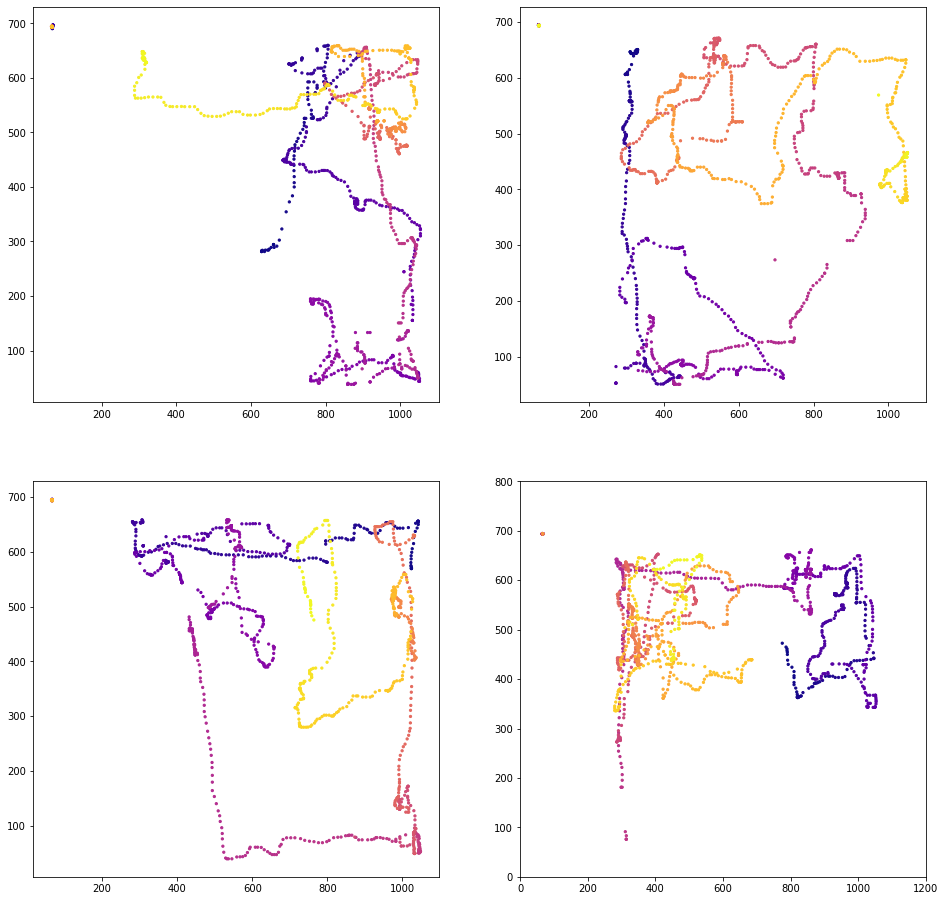

In [5]:
import math

fps = 25
fpm = fps * 60
numFramesTotal = len(Dataframe.index)
minutesTotal = math.floor(numFramesTotal / fpm) #gets number of minutes in the video, rounded down to plot each one

ten_min_increments = minutesTotal / 10

numColumns = 2

numRows = math.ceil(ten_min_increments / numColumns)

# If you want to "zoom in" on the mouse in each time interval, set sharex=False, sharey=False
# For equal scaling in all subplots, set sharex=True, sharey=True
fig, axs = plt.subplots(numRows, numColumns, sharex=False, sharey=False, figsize=(16,16)) 
plt.xlim(0, 1200)
plt.ylim(0, 800)

lowIndex = 0
highIndex = fpm
for n, ax in enumerate(axs.flatten()):
  subDf = Dataframe[lowIndex:highIndex]
  sub_xsnout = subDf[DLCscorer][bpt]['x'].values
  sub_ysnout = subDf[DLCscorer][bpt]['y'].values

  ax.scatter(sub_xsnout,sub_ysnout, s=5, c=subDf.index.values, cmap='plasma')
  plt.gca().invert_yaxis()

  lowIndex += fpm
  highIndex += fpm

for a in fig.axes:
    a.tick_params(
    axis='both',           # changes apply to the x-axis
    which='both',       # both major and minor ticks are affected
    bottom=True,
    top=False,
    left=True,
    right=False,
    labelleft=True,
    labelbottom=True)    # labels along the bottom edge are on
    
    
plt.show()

#BASELINE IS SHOWN BELOW

In [7]:
video='snrround2ffz_3904_f_Trial1.mp4'

DLCscorer='DLC_resnet50_Pilot_v1_single_animalJun29shuffle1_400000'

#dataname = str(Path(video).stem) + DLCscorer + '.h5'

bpt = 'snout'

#loading output of DLC

Dataframe = pd.read_hdf('snrffz_3904_f_Trial1DLC_resnet50_Pilot_v1_single_animalJun29shuffle1_400000_filtered.h5')

In [8]:
Dataframe = Dataframe[Dataframe[DLCscorer][bpt]['likelihood'] != 0]

Dataframe

scorer    DLC_resnet50_Pilot_v1_single_animalJun29shuffle1_400000             \
bodyparts                                                      tl              
coords                                                          x          y   
0                                                  20.662979       30.063128   
1                                                  20.662979       30.063128   
2                                                  20.662979       30.081350   
3                                                  20.355122       30.103100   
4                                                  20.355122       30.103100   
...                                                      ...             ...   
135058                                             20.331949       30.005337   
135059                                             20.368729       29.843401   
135060                                             20.679861       30.005337   
135061                                             20.679861       29.843401   
135062                                             20.331949       29.653654   

scorer                                                               \
bodyparts                      tr                                bl   
coords    likelihood            x          y likelihood           x   
0           0.506600  1062.536255  28.915289   0.997376  269.301880   
1           0.498591  1062.597900  29.156963   0.997225  269.301880   
2           0.538594  1062.732910  29.156963   0.997424  269.301880   
3           0.724582  1062.732910  29.156963   0.997588  268.888428   
4           0.722082  1062.842041  29.133432   0.997710  268.775726   
...              ...          ...        ...        ...         ...   
135058      0.649704  1063.091675  28.785860   0.976687  268.475861   
135059      0.557033  1063.091675  28.743567   0.990809  268.482422   
135060      0.445018  1063.091675  28.743567   0.976943  269.168030   
135061      0.629374  1062.888306  28.743567   0.977647  269.168030   
135062      0.687301  1062.816040  28.446859   0.967650  269.168030   

scorer                                         ...                           \
bodyparts                                  br  ... left_backpaw   tail_base   
coords              y likelihood            x  ...   likelihood           x   
0          672.107849   0.918649  1063.201172  ...     0.999658  987.752869   
1          672.107849   0.989283  1063.534546  ...     0.999683  990.588013   
2          672.107849   0.994212  1063.632568  ...     0.999544  991.817322   
3          671.860901   0.997508  1063.829102  ...     0.999362  992.221924   
4          671.813354   0.996121  1064.030273  ...     0.999524  992.850281   
...               ...        ...          ...  ...          ...         ...   
135058     671.885986   0.992004  1299.359009  ...     0.999501  253.283859   
135059     671.885986   0.994228  1065.237915  ...     0.999391  253.283859   
135060     672.207642   0.974115   268.971893  ...     0.999572  253.132034   
135061     672.207642   0.984690     8.788891  ...     0.999387  253.132034   
135062     672.207642   0.963289     8.703081  ...     0.999379  252.607025   

scorer                                                               \
bodyparts                           tail_mid                          
coords              y likelihood           x           y likelihood   
0          518.560791   0.999927  962.068359  468.702606   0.913132   
1          519.715759   0.999920  962.068359  468.702606   0.918661   
2          521.187073   0.999818  966.129150  469.225983   0.874249   
3          522.698608   0.999910  966.129150  468.702606   0.840326   
4          525.351196   0.999938  307.350739  122.238007   0.915368   
...               ...        ...         ...         ...        ...   
135058     158.727020   0.746135  307.401672  122.321815   0.944985   
135059     158.174072   0.937146  307.224884  122.579803   0.945768

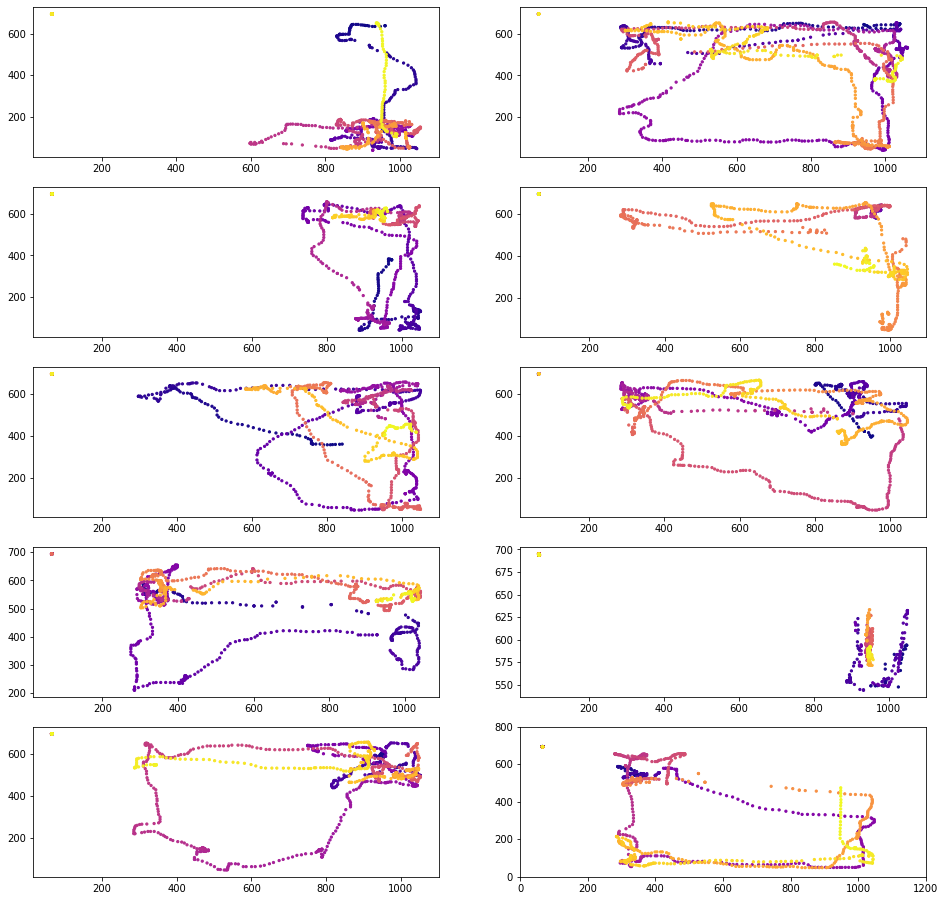

In [9]:
import math



fps = 25
fpm = fps * 60
numFramesTotal = len(Dataframe.index)
minutesTotal = math.floor(numFramesTotal / fpm) #gets number of minutes in the video, rounded down to plot each one

ten_min_increments = minutesTotal / 10

numColumns = 2

numRows = math.ceil(ten_min_increments / numColumns)

# If you want to "zoom in" on the mouse in each time interval, set sharex=False, sharey=False
# For equal scaling in all subplots, set sharex=True, sharey=True
fig, axs = plt.subplots(numRows, numColumns, sharex=False, sharey=False, figsize=(16,16)) 
plt.xlim(0, 1200)
plt.ylim(0, 800)

lowIndex = 0
highIndex = fpm
for n, ax in enumerate(axs.flatten()):
  subDf = Dataframe[lowIndex:highIndex]
  sub_xsnout = subDf[DLCscorer][bpt]['x'].values
  sub_ysnout = subDf[DLCscorer][bpt]['y'].values

  ax.scatter(sub_xsnout,sub_ysnout, s=5, c=subDf.index.values, cmap='plasma')
  plt.gca().invert_yaxis()

  lowIndex += fpm
  highIndex += fpm

for a in fig.axes:
    a.tick_params(
    axis='both',           # changes apply to the x-axis
    which='both',       # both major and minor ticks are affected
    bottom=True,
    top=False,
    left=True,
    right=False,
    labelleft=True,
    labelbottom=True)    # labels along the bottom edge are on
    
    
plt.show()

#FFZ IS SHOWN BELOW

In [10]:
hdf_path = '/home/mclea2ll-local/Documents/DeepLabCut/Video_Analysis/SNR_LMO7_turning_Lily/snrbaseline_3904_f_Trial1DLC_resnet50_Pilot_v1_single_animalJun29shuffle1_400000_filtered.h5'
Dataframe = pd.read_hdf(hdf_path)

DLCscorer='DLC_resnet50_Pilot_v1_single_animalJun29shuffle1_400000'
bpt = 'snout'

x_snout = Dataframe[DLCscorer][bpt]['x'].values
y_snout = Dataframe[DLCscorer][bpt]['y'].values

from mpl_toolkits.mplot3d import proj3d

def make_get_proj(self, rx, ry, rz):
    '''
    Return a variation on :func:`~mpl_toolkit.mplot2d.axes3d.Axes3D.getproj` that
    makes the box aspect ratio equal to *rx:ry:rz*, using an axes object *self*.
    '''

    rm = max(rx, ry, rz)
    kx = rm / rx; ky = rm / ry; kz = rm / rz;

    # Copied directly from mpl_toolkit/mplot3d/axes3d.py. New or modified lines are
    # marked by ##
    def get_proj():
        relev, razim = np.pi * self.elev/180, np.pi * self.azim/180

        xmin, xmax = self.get_xlim3d()
        ymin, ymax = self.get_ylim3d()
        zmin, zmax = self.get_zlim3d()

        # transform to uniform world coordinates 0-1.0,0-1.0,0-1.0
        worldM = proj3d.world_transformation(xmin, xmax,
                                             ymin, ymax,
                                             zmin, zmax)

        # adjust the aspect ratio                          ##
        aspectM = proj3d.world_transformation(-kx + 1, kx, ##
                                              -ky + 1, ky, ##
                                              -kz + 1, kz) ##

        # look into the middle of the new coordinates
        R = np.array([0.5, 0.5, 0.5])

        xp = R[0] + np.cos(razim) * np.cos(relev) * self.dist
        yp = R[1] + np.sin(razim) * np.cos(relev) * self.dist
        zp = R[2] + np.sin(relev) * self.dist
        E = np.array((xp, yp, zp))

        self.eye = E
        self.vvec = R - E
        self.vvec = self.vvec / proj3d.mod(self.vvec)

        if abs(relev) > np.pi/2:
            # upside down
            V = np.array((0, 0, -1))
        else:
            V = np.array((0, 0, 1))
        zfront, zback = -self.dist, self.dist

        viewM = proj3d.view_transformation(E, R, V)
        perspM = proj3d.persp_transformation(zfront, zback)
        M0 = np.dot(viewM, np.dot(aspectM, worldM)) ##
        M = np.dot(perspM, M0)
        return M
    return get_proj

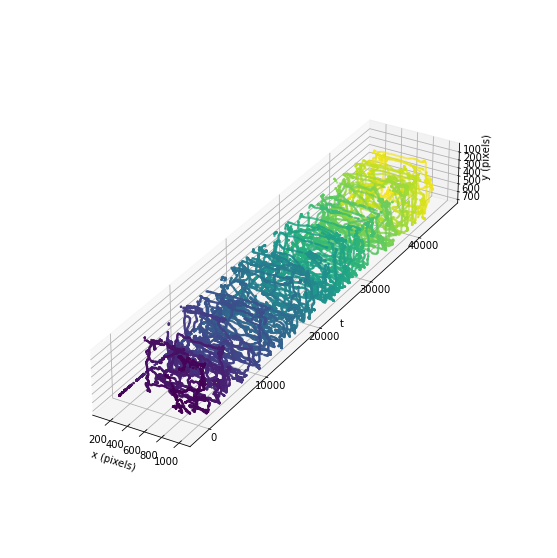

In [11]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

ax.scatter3D(x_snout, Dataframe.index.values, y_snout, s=2, c= Dataframe.index.values, cmap= 'viridis')
ax.invert_zaxis()
ax.set_xlabel('x (pixels)')
ax.set_ylabel('t')
ax.set_zlabel('y (pixels)')


ax.set_box_aspect(((x_snout.max() - x_snout.min()), 5000, (y_snout.max() - y_snout.min())))

#BASELINE IS SHOWN BELOW

In [12]:
hdf_path = '/home/mclea2ll-local/Documents/DeepLabCut/Video_Analysis/SNR_LMO7_turning_Lily/snrbaseline_3901_f_Trial1DLC_resnet50_Pilot_v1_single_animalJun29shuffle1_400000_filtered.h5'
Dataframe = pd.read_hdf(hdf_path)

DLCscorer='DLC_resnet50_Pilot_v1_single_animalJun29shuffle1_400000'
bpt = 'snout'

x_snout = Dataframe[DLCscorer][bpt]['x'].values
y_snout = Dataframe[DLCscorer][bpt]['y'].values

ValueError: zero-size array to reduction operation maximum which has no identity

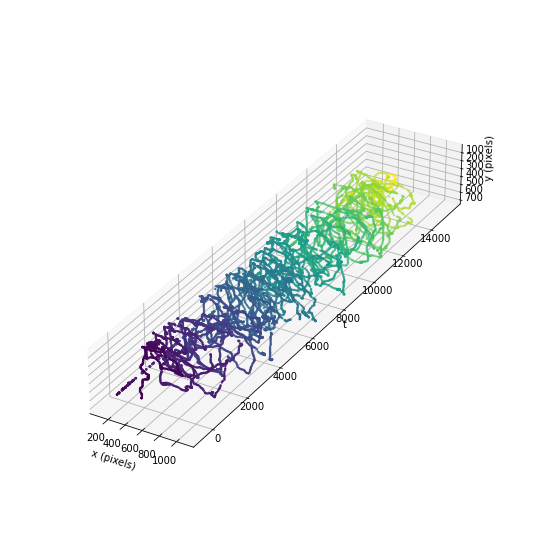

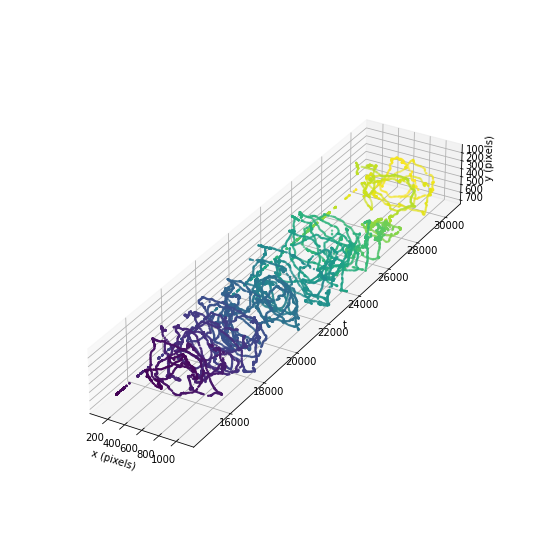

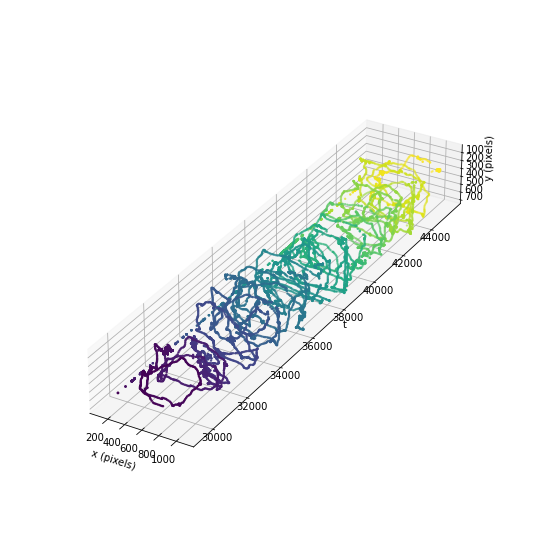

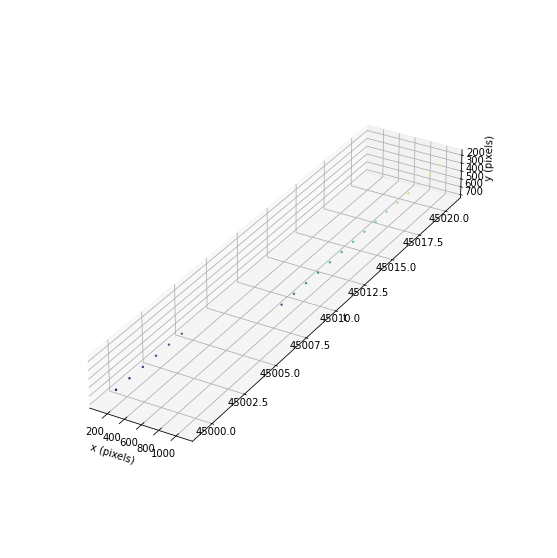

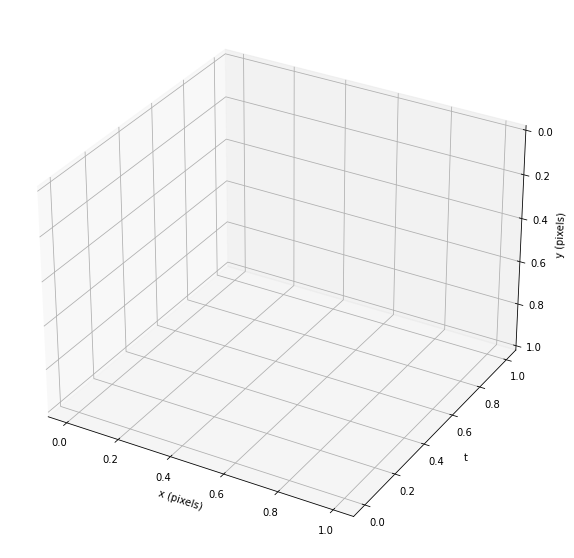

In [13]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

xsnout10min = x_snout[0:15000]
ysnout10min = y_snout[0:15000]

ax.scatter3D(xsnout10min, Dataframe[0:15000].index.values, ysnout10min, s=2, c= Dataframe[0:15000].index.values, cmap= 'viridis')
ax.invert_zaxis()
ax.set_xlabel('x (pixels)')
ax.set_ylabel('t')
ax.set_zlabel('y (pixels)')

ax.set_box_aspect(((xsnout10min.max() - xsnout10min.min()), 5000, (ysnout10min.max() - ysnout10min.min())))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

xsnout10min = x_snout[15000:30000]
ysnout10min = y_snout[15000:30000]

ax.scatter3D(xsnout10min, Dataframe[15000:30000].index.values, ysnout10min, s=2, c= Dataframe[15000:30000].index.values, cmap= 'viridis')
ax.invert_zaxis()
ax.set_xlabel('x (pixels)')
ax.set_ylabel('t')
ax.set_zlabel('y (pixels)')

ax.set_box_aspect(((xsnout10min.max() - xsnout10min.min()), 5000, (ysnout10min.max() - ysnout10min.min())))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

xsnout10min = x_snout[30000:45000]
ysnout10min = y_snout[30000:45000]

ax.scatter3D(xsnout10min, Dataframe[30000:45000].index.values, ysnout10min, s=2, c= Dataframe[30000:45000].index.values, cmap= 'viridis')
ax.invert_zaxis()
ax.set_xlabel('x (pixels)')
ax.set_ylabel('t')
ax.set_zlabel('y (pixels)')

ax.set_box_aspect(((xsnout10min.max() - xsnout10min.min()), 5000, (ysnout10min.max() - ysnout10min.min())))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

xsnout10min = x_snout[45000:60000]
ysnout10min = y_snout[45000:60000]

ax.scatter3D(xsnout10min, Dataframe[45000:60000].index.values, ysnout10min, s=2, c= Dataframe[45000:60000].index.values, cmap= 'viridis')
ax.invert_zaxis()
ax.set_xlabel('x (pixels)')
ax.set_ylabel('t')
ax.set_zlabel('y (pixels)')

ax.set_box_aspect(((xsnout10min.max() - xsnout10min.min()), 5000, (ysnout10min.max() - ysnout10min.min())))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

xsnout10min = x_snout[60000:75000]
ysnout10min = y_snout[60000:75000]

ax.scatter3D(xsnout10min, Dataframe[60000:75000].index.values, ysnout10min, s=2, c= Dataframe[60000:75000].index.values, cmap= 'viridis')
ax.invert_zaxis()
ax.set_xlabel('x (pixels)')
ax.set_ylabel('t')
ax.set_zlabel('y (pixels)')

ax.set_box_aspect(((xsnout10min.max() - xsnout10min.min()), 5000, (ysnout10min.max() - ysnout10min.min())))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

xsnout10min = x_snout[75000:90000]
ysnout10min = y_snout[75000:90000]

ax.scatter3D(xsnout10min, Dataframe[75000:90000].index.values, ysnout10min, s=2, c= Dataframe[75000:90000].index.values, cmap= 'viridis')
ax.invert_zaxis()
ax.set_xlabel('x (pixels)')
ax.set_ylabel('t')
ax.set_zlabel('y (pixels)')

ax.set_box_aspect(((xsnout10min.max() - xsnout10min.min()), 5000, (ysnout10min.max() - ysnout10min.min())))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

xsnout10min = x_snout[90000:105000]
ysnout10min = y_snout[90000:105000]

ax.scatter3D(xsnout10min, Dataframe[90000:105000].index.values, ysnout10min, s=2, c= Dataframe[90000:105000].index.values, cmap= 'viridis')
ax.invert_zaxis()
ax.set_xlabel('x (pixels)')
ax.set_ylabel('t')
ax.set_zlabel('y (pixels)')

ax.set_box_aspect(((xsnout10min.max() - xsnout10min.min()), 5000, (ysnout10min.max() - ysnout10min.min())))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

xsnout10min = x_snout[105000:120000]
ysnout10min = y_snout[105000:120000]

ax.scatter3D(xsnout10min, Dataframe[105000:120000].index.values, ysnout10min, s=2, c= Dataframe[105000:120000].index.values, cmap= 'viridis')
ax.invert_zaxis()
ax.set_xlabel('x (pixels)')
ax.set_ylabel('t')
ax.set_zlabel('y (pixels)')

ax.set_box_aspect(((xsnout10min.max() - xsnout10min.min()), 5000, (ysnout10min.max() - ysnout10min.min())))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

xsnout10min = x_snout[120000:135000]
ysnout10min = y_snout[120000:135000]

ax.scatter3D(xsnout10min, Dataframe[120000:135000].index.values, ysnout10min, s=2, c= Dataframe[120000:135000].index.values, cmap= 'viridis')
ax.invert_zaxis()
ax.set_xlabel('x (pixels)')
ax.set_ylabel('t')
ax.set_zlabel('y (pixels)')

ax.set_box_aspect(((xsnout10min.max() - xsnout10min.min()), 5000, (ysnout10min.max() - ysnout10min.min())))

#BASELINE IS SHOWN BELOW

In [14]:
hdf_path = '/home/mclea2ll-local/Documents/DeepLabCut/Video_Analysis/SNR_LMO7_turning_Lily/snrffz_3904_f_Trial1DLC_resnet50_Pilot_v1_single_animalJun29shuffle1_400000_filtered.h5'
Dataframe = pd.read_hdf(hdf_path)

DLCscorer='DLC_resnet50_Pilot_v1_single_animalJun29shuffle1_400000'
bpt = 'snout'

x_snout = Dataframe[DLCscorer][bpt]['x'].values
y_snout = Dataframe[DLCscorer][bpt]['y'].values

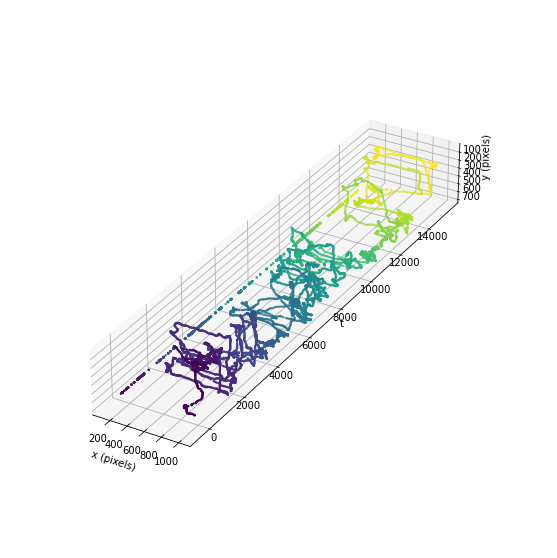

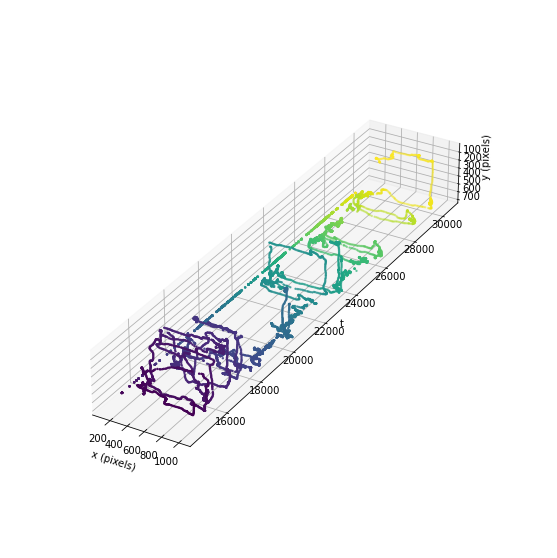

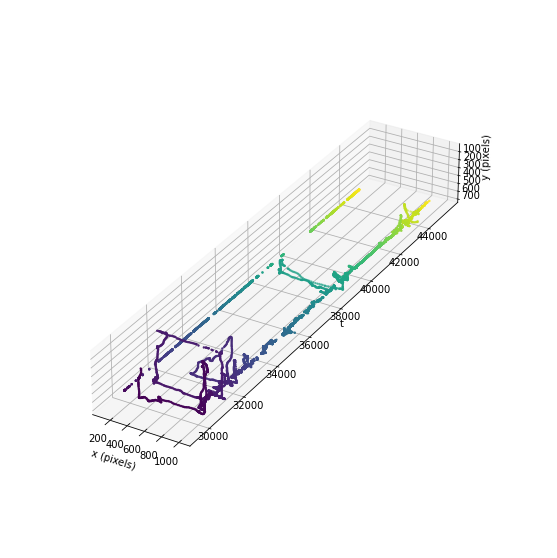

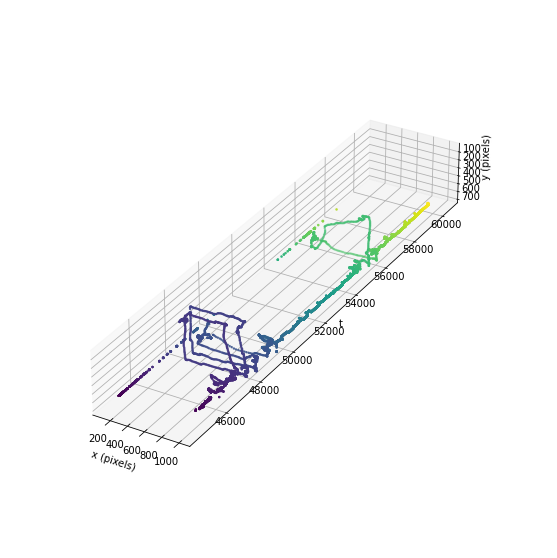

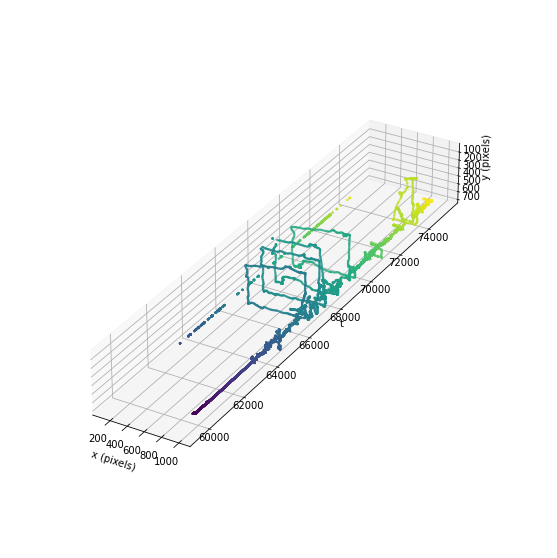

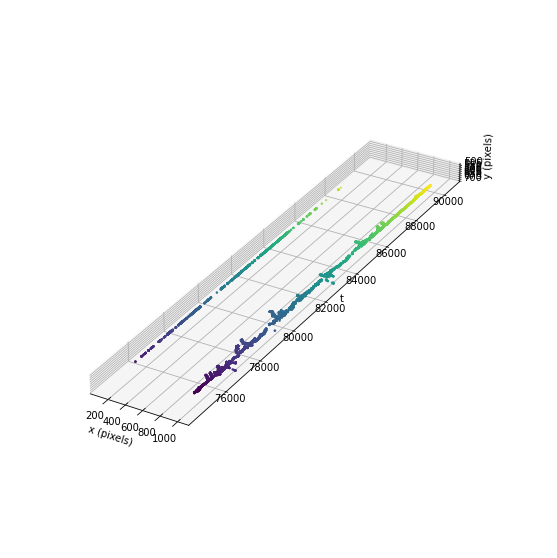

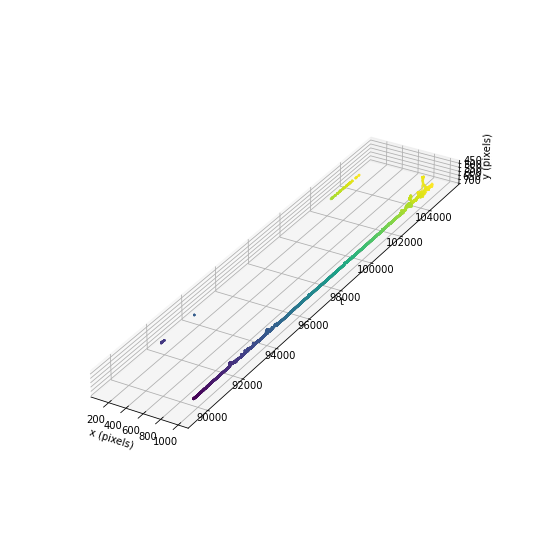

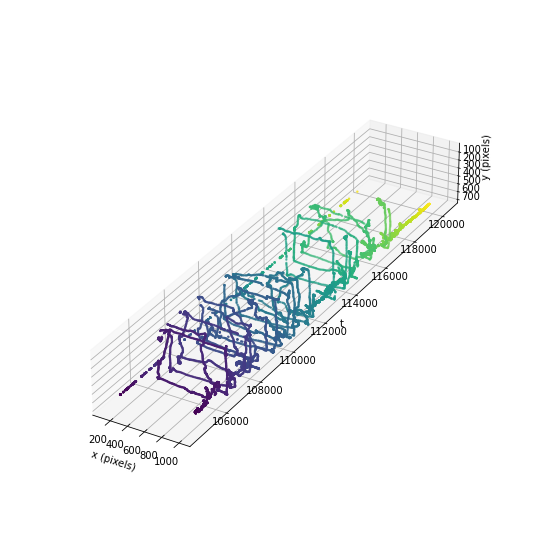

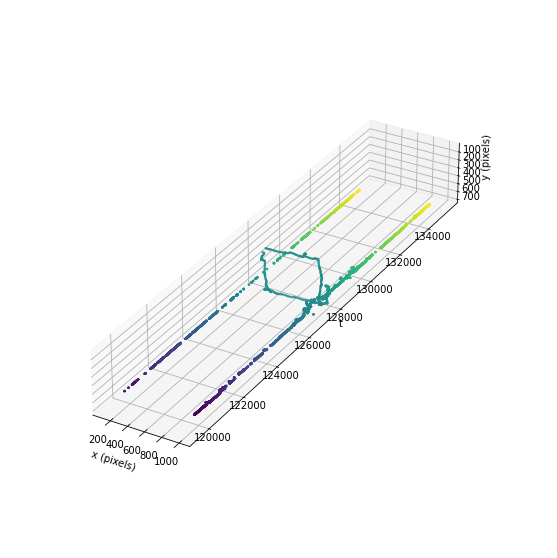

In [15]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

xsnout10min = x_snout[0:15000]
ysnout10min = y_snout[0:15000]

ax.scatter3D(xsnout10min, Dataframe[0:15000].index.values, ysnout10min, s=2, c= Dataframe[0:15000].index.values, cmap= 'viridis')
ax.invert_zaxis()
ax.set_xlabel('x (pixels)')
ax.set_ylabel('t')
ax.set_zlabel('y (pixels)')

ax.set_box_aspect(((xsnout10min.max() - xsnout10min.min()), 5000, (ysnout10min.max() - ysnout10min.min())))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

xsnout10min = x_snout[15000:30000]
ysnout10min = y_snout[15000:30000]

ax.scatter3D(xsnout10min, Dataframe[15000:30000].index.values, ysnout10min, s=2, c= Dataframe[15000:30000].index.values, cmap= 'viridis')
ax.invert_zaxis()
ax.set_xlabel('x (pixels)')
ax.set_ylabel('t')
ax.set_zlabel('y (pixels)')

ax.set_box_aspect(((xsnout10min.max() - xsnout10min.min()), 5000, (ysnout10min.max() - ysnout10min.min())))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

xsnout10min = x_snout[30000:45000]
ysnout10min = y_snout[30000:45000]

ax.scatter3D(xsnout10min, Dataframe[30000:45000].index.values, ysnout10min, s=2, c= Dataframe[30000:45000].index.values, cmap= 'viridis')
ax.invert_zaxis()
ax.set_xlabel('x (pixels)')
ax.set_ylabel('t')
ax.set_zlabel('y (pixels)')

ax.set_box_aspect(((xsnout10min.max() - xsnout10min.min()), 5000, (ysnout10min.max() - ysnout10min.min())))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

xsnout10min = x_snout[45000:60000]
ysnout10min = y_snout[45000:60000]

ax.scatter3D(xsnout10min, Dataframe[45000:60000].index.values, ysnout10min, s=2, c= Dataframe[45000:60000].index.values, cmap= 'viridis')
ax.invert_zaxis()
ax.set_xlabel('x (pixels)')
ax.set_ylabel('t')
ax.set_zlabel('y (pixels)')

ax.set_box_aspect(((xsnout10min.max() - xsnout10min.min()), 5000, (ysnout10min.max() - ysnout10min.min())))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

xsnout10min = x_snout[60000:75000]
ysnout10min = y_snout[60000:75000]

ax.scatter3D(xsnout10min, Dataframe[60000:75000].index.values, ysnout10min, s=2, c= Dataframe[60000:75000].index.values, cmap= 'viridis')
ax.invert_zaxis()
ax.set_xlabel('x (pixels)')
ax.set_ylabel('t')
ax.set_zlabel('y (pixels)')

ax.set_box_aspect(((xsnout10min.max() - xsnout10min.min()), 5000, (ysnout10min.max() - ysnout10min.min())))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

xsnout10min = x_snout[75000:90000]
ysnout10min = y_snout[75000:90000]

ax.scatter3D(xsnout10min, Dataframe[75000:90000].index.values, ysnout10min, s=2, c= Dataframe[75000:90000].index.values, cmap= 'viridis')
ax.invert_zaxis()
ax.set_xlabel('x (pixels)')
ax.set_ylabel('t')
ax.set_zlabel('y (pixels)')

ax.set_box_aspect(((xsnout10min.max() - xsnout10min.min()), 5000, (ysnout10min.max() - ysnout10min.min())))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

xsnout10min = x_snout[90000:105000]
ysnout10min = y_snout[90000:105000]

ax.scatter3D(xsnout10min, Dataframe[90000:105000].index.values, ysnout10min, s=2, c= Dataframe[90000:105000].index.values, cmap= 'viridis')
ax.invert_zaxis()
ax.set_xlabel('x (pixels)')
ax.set_ylabel('t')
ax.set_zlabel('y (pixels)')

ax.set_box_aspect(((xsnout10min.max() - xsnout10min.min()), 5000, (ysnout10min.max() - ysnout10min.min())))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

xsnout10min = x_snout[105000:120000]
ysnout10min = y_snout[105000:120000]

ax.scatter3D(xsnout10min, Dataframe[105000:120000].index.values, ysnout10min, s=2, c= Dataframe[105000:120000].index.values, cmap= 'viridis')
ax.invert_zaxis()
ax.set_xlabel('x (pixels)')
ax.set_ylabel('t')
ax.set_zlabel('y (pixels)')

ax.set_box_aspect(((xsnout10min.max() - xsnout10min.min()), 5000, (ysnout10min.max() - ysnout10min.min())))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

xsnout10min = x_snout[120000:135000]
ysnout10min = y_snout[120000:135000]

ax.scatter3D(xsnout10min, Dataframe[120000:135000].index.values, ysnout10min, s=2, c= Dataframe[120000:135000].index.values, cmap= 'viridis')
ax.invert_zaxis()
ax.set_xlabel('x (pixels)')
ax.set_ylabel('t')
ax.set_zlabel('y (pixels)')

ax.set_box_aspect(((xsnout10min.max() - xsnout10min.min()), 5000, (ysnout10min.max() - ysnout10min.min())))

#FFZ IS SHOWN BELOW